# NLTK book Chapter 1 - what I found interesting

In [84]:
import nltk
from nltk.book import *
from pprint import pprint

## Getting text stats

In [35]:
# how many word TOKENS, and TYPES
def get_text_stats(text):
    # how many TOKENS, TYPES and TYPES when ignoring case
    tokens = len(sorted(text))
    types = len(sorted(set(text)))
    types_ignore_case = len(sorted(set(w.lower() for w in text)))
    percentage_raw = types_ignore_case / tokens * 100
    percentage_distinct_words = float("{0:.2f}".format(percentage_raw))
    return (tokens, types, types_ignore_case, percentage_distinct_words)

In [36]:
get_text_stats(text3)

(44764, 2789, 2628, 5.87)

In [38]:
# because this one is fun:
print(" ".join(sent4 + sent1))

Fellow - Citizens of the Senate and of the House of Representatives : Call me Ishmael .


Oh oh oh! This is fun!
### TODO: Create a text by mixing sentences from different novels! : D

In [41]:
# said than
saying = ['After', 'all', 'is', 'said', 'and', 'done',
          'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:]
# correct :)

['said', 'than']

In [42]:
# frequency distributions out of the box
fdist = FreqDist(text5)

In [44]:
print(fdist.most_common(50))

[('.', 1268), ('JOIN', 1021), ('PART', 1016), ('?', 737), ('lol', 704), ('to', 658), ('i', 648), ('the', 646), ('you', 635), (',', 596), ('I', 576), ('a', 568), ('hi', 546), ('me', 415), ('...', 412), ('is', 372), ('..', 361), ('in', 357), ('ACTION', 346), ('!', 342), ('and', 335), ('it', 332), ('that', 274), ('hey', 264), ('my', 242), ('of', 202), ('u', 200), ("'s", 195), ('for', 188), ('on', 186), ('what', 183), ('here', 181), ('are', 178), ('not', 170), ('....', 170), ('do', 168), ('all', 165), ('have', 164), ('up', 160), ('like', 156), ('no', 155), ('with', 152), ('was', 142), ('chat', 142), ("n't", 141), ('so', 139), ('your', 137), ('/', 133), ("'m", 133), ('good', 130)]


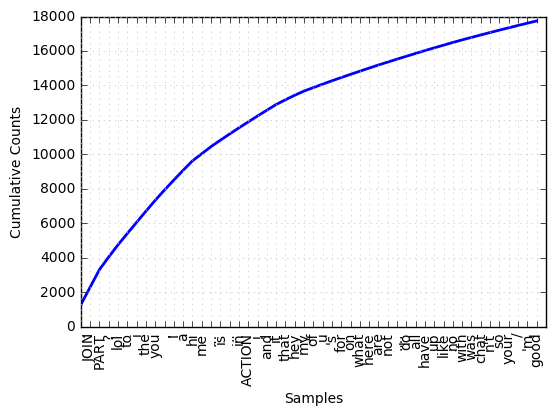

In [45]:
fdist.plot(50, cumulative=True)

In [46]:
get_text_stats(text5)

(45010, 6066, 5441, 12.09)

## Maths revelation and long and frequent hapaxes

In [50]:
# learned that hapaxes are words that occur only once in a corpus
fdist.hapaxes()[:20]

['',
 'JESUS',
 'client',
 'heat',
 'smacks',
 'whose',
 ':love:',
 'World',
 'series',
 'urls',
 're-think',
 'de-tubetop',
 'seee',
 'dust',
 'jujubees',
 'boom',
 "sayin'",
 'plows',
 'Bud',
 'MOUTH']

Now this is exciting and makes me understand something about maths.

<img src="img/math_python.png">

Let's bring it together in code.

In [52]:
V = set(text5)
def p(w):
    if len(w) > 15:
        return True
    else:
        return False

In [68]:
# looking only at the first 6, because there are many and you can get the point
[w for w in V if p(w)][:6]

['http://forums.talkcity.com/tc-adults/start ',
 'wheeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee',
 '..............................',
 'HHEEYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY',
 'bbbbbyyyyyyyeeeeeeeee',
 '.(..(.vMp3 vi.p.t.)..).']

^ Beautiful! 😁

In [69]:
# let's make this code better readable and expand it a bit
vocabulary = set(text5)
def is_long_and_frequent(w):
    """checks whether a word is long and frequent"""
    length, frequency = 8, 8
    if len(w) > length and fdist[w] > frequency:
        return True
    else:
        return False

In [71]:
# filter for words, according to the defined criteria
[w for w in vocabulary if is_long_and_frequent(w)]

['cute.-ass',
 'seriously',
 '((((((((((',
 'listening',
 '#14-19teens',
 'something',
 '#talkcity_adults']

Does it give somewhat of a characterization of the text? Let's check it on all of them.

In [90]:
def is_long_and_frequent(w):
    """checks whether a word is long and frequent"""
    length, frequency = 7, 7
    if len(w) > length and fdist[w] > frequency:
        return True
    else:
        return False

def get_fingerprint(text):
    vocabulary = set(text)
    fingerprint_words = [w for w in vocabulary if is_long_and_frequent(w)]
    return fingerprint_words

In [189]:
# list comprehension to get a text list of available corpora
text_list = ["text{}".format(n+1) for n in range(9)]

In [98]:
all_text_words = []
for text in text_list:
    for word in get_fingerprint(eval(text)):
        all_text_words.append(word)

In [101]:
multi_words = [w for w in all_text_words if all_text_words.count(w) != 1]

In [102]:
fingerprints = []
for text in text_list:
    for word in get_fingerprint(eval(text)):
        if word not in multi_words:
            fingerprints.append(word)
fingerprints

['cute.-ass',
 '((((((((((',
 '........',
 '#14-19teens',
 '#talkcity_adults',
 'Question']

Interesting! The only text that hosts distinctly different words (that are both long and frequent, according to the arbitrarily defined values I chose) from the other texts is the chat corpus.

So that was a lot of code for the same print result! : ) But knowledge-level increased.

## Bigrams and Collocations

In [74]:
text3.collocations()

said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast


In [75]:
text5.collocations()

wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time


## Frequencies of stuff

In [107]:
# create a frequency dict for the length of the words
fdist = FreqDist([len(w) for w in text5])

In [108]:
fdist

FreqDist({0: 1,
          1: 6236,
          2: 8129,
          3: 10938,
          4: 10204,
          5: 3789,
          6: 2442,
          7: 1457,
          8: 796,
          9: 419,
          10: 222,
          11: 140,
          12: 63,
          13: 29,
          14: 12,
          15: 15,
          16: 28,
          17: 9,
          18: 8,
          19: 6,
          20: 9,
          21: 8,
          22: 5,
          23: 6,
          24: 3,
          25: 8,
          26: 2,
          27: 2,
          28: 3,
          29: 1,
          30: 2,
          31: 2,
          32: 2,
          34: 1,
          35: 1,
          36: 2,
          37: 1,
          38: 1,
          43: 3,
          50: 1,
          51: 1,
          54: 1,
          67: 1,
          70: 1})

In [109]:
fdist.max()

3

In [110]:
fdist.freq(3)

0.24301266385247722

In [112]:
fdist.N()

45010

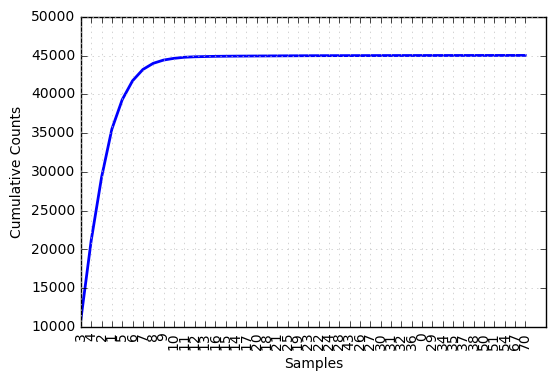

In [116]:
fdist.plot(cumulative=True)

## Some Python revision

In [117]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)

['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [119]:
def get_vocabulary(text):
    vocabulary = set([w.lower() for w in text if w.isalpha()])
    return vocabulary

In [122]:
len(get_vocabulary(text3))

2615

In [123]:
# let's see how much I've removed
len(get_vocabulary(text3)) - get_text_stats(text3)[2]

-13

In [124]:
# wohoo! -13 non-alpha characters. :)

### generating pseudo-hashtags from me and you in a corpus :)

In [141]:
query = [w.lower() for w in set(sorted(text5)) if "me" in w or "you" in w]

In [143]:
# generate pseudo-hashtags using print's 'end' argument (obviously this is crap ;)
for word in query:
    print(word, end=" #")

welome #mame #same #comenting #home #came #costumes #game #meant #awsome #ashamed #camel #handsome #assumes #games #summer #yourself #excitement #oatmeal #men #punishment #pmers #you #syndrome #comments #development #overtime #americans #welcome #experimenting #come #*smewchies* #prime #permenant #gomer #james #homes #yours #mexicans #medicine #rememberer #farmer #messages #mercy #some #remember #mena #time #something #presume #member #mexican #comes #mean #james #bummer #homework #metal #messenger #someone #nickname #home #younger #sometime #youer #homeboys #menu #jammed #alzheimers #gamefly #iamahotniplickme #emergency #young #lame #awesomee #immediate #time #aqwesome #lime #flames #mercedes #meeeeeeeeeeeee #meredith #aime #meds #flame #someday #names #youve #barometer #amen #women #meet #everytime #anytime #sometimes #me #smells #nicnames #awesome #smewchies #youuuu #immersed #american #somewhere #compliments #nicname #gentlemen #medium #homeade #remembah #somebody #recomend #someon

## Back into the layr of language

### TODO: wohooo! Make an automatic comic-generator, that uses intentionally misinterpreted Word Sense Disambiguation (thus, I guess, "Word Sense Ambiguation") to create jokes!

e.g.:
    
<img src="img/serve_dish.png">

_he served the dish_

## Let's have a talk

With one of NLTK's chatbots. It doesn't work in jupyter notebooks, but does in the terminal: 
```
import nltk
nltk.chat.chatbots()
```

Then enter a number of your choice.

# Some selected Exercises

In [157]:
["MOnty", "Python"] * 3

['MOnty', 'Python', 'MOnty', 'Python', 'MOnty', 'Python']

**Nice task:**

6 ☼ Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

In [151]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

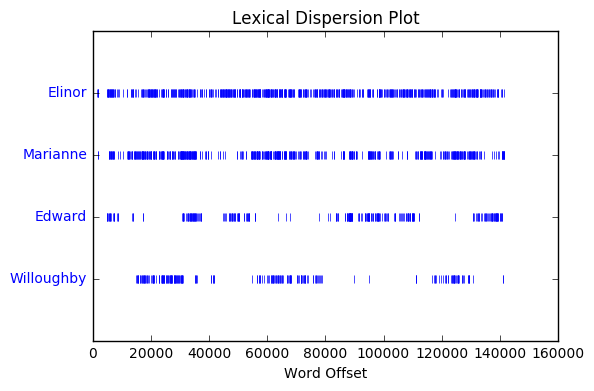

In [153]:
peeps = ["Elinor", "Marianne", "Edward", "Willoughby"]
text2.dispersion_plot(peeps)

I'd say that Marianne and Willoughby are a couple, and probably also Elinor and Edward. Elinor seems to be the main character.

19 ◑ What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?

In [155]:
print(len(sorted(set(w.lower() for w in text1))))
print(len(sorted(w.lower() for w in set(text1))))

17231
19317


21 ◑ Write the slice expression that extracts the last two words of text2.

In [156]:
text2[-2:]

['THE', 'END']

22 ◑ Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.

In [159]:
fdist = FreqDist([w for w in text5 if len(w) == 4])

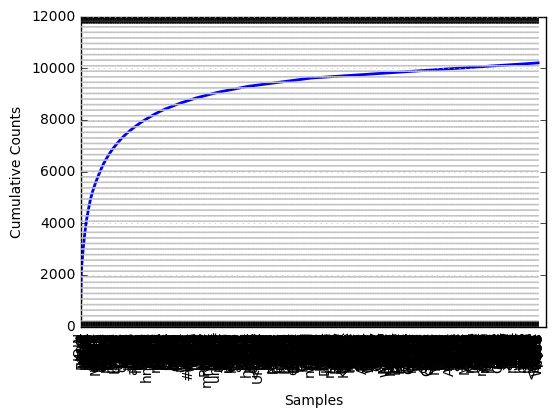

In [161]:
fdist.plot(cumulative=True)

In [164]:
fdist.most_common(10)

[('JOIN', 1021),
 ('PART', 1016),
 ('that', 274),
 ('what', 183),
 ('here', 181),
 ('....', 170),
 ('have', 164),
 ('like', 156),
 ('with', 152),
 ('chat', 142)]

23 ◑ Review the discussion of looping with conditions in 4. Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

In [170]:
# slightly adapted, printing only unique words and excluding single-char words
# such as "A" or "I" that are only capitalized, not upcased.
upcase_montys = set()
for word in text6:
    if word.isupper() and len(word) > 1:
        upcase_montys.add(word)

In [172]:
# and saving space ;)
print(upcase_montys, end=" ")

{'PRINCESS', 'FRENCH', 'LUCKY', 'PRINCE', 'MONKS', 'SHRUBBER', 'GUEST', 'LAUNCELOT', 'CONCORDE', 'STUNNER', 'ANIMATOR', 'MASTER', 'CHARACTER', 'SOLDIER', 'SCENE', 'MIDDLE', 'HEAD', 'SIR', 'WOMAN', 'KNIGHTS', 'OFFICER', 'GUARDS', 'THE', 'BRIDE', 'GUESTS', 'CUSTOMER', 'DIRECTOR', 'NARRATOR', 'LEFT', 'ROGER', 'PARTY', 'FATHER', 'NI', 'PIGLET', 'WITCH', 'KING', 'LOVELY', 'ALL', 'CARTOON', 'GOD', 'VILLAGERS', 'WINSTON', 'OTHER', 'CRONE', 'BEDEVERE', 'PRISONER', 'SUN', 'CAMERAMAN', 'GREEN', 'DINGO', 'OLD', 'AMAZING', 'CART', 'ARTHUR', 'CHARACTERS', 'SECOND', 'CRAPPER', 'DEAD', 'CROWD', 'MAN', 'TIM', 'WIFE', 'MIDGET', 'HEADS', 'GALAHAD', 'PATSY', 'GIRLS', 'HISTORIAN', 'MINSTREL', 'MAYNARD', 'BLACK', 'BRIDGEKEEPER', 'OF', 'VOICE', 'ARMY', 'PERSON', 'CRASH', 'RIGHT', 'ENCHANTER', 'ROBIN', 'VILLAGER', 'GUARD', 'RANDOM', 'BROTHER', 'KNIGHT', 'BORS', 'ZOOT', 'INSPECTOR', 'DENNIS', 'SENTRY', 'HERBERT'} 

24 ◑ Write expressions for finding all words in text6 that meet the conditions listed below. The result should be in the form of a list of words: `['word1', 'word2', ...]`.

- Ending in ize
- Containing the letter z
- Containing the sequence of letters pt
- Having all lowercase letters except for an initial capital (i.e., titlecase)

In [179]:
[w for w in set(text6) if w.endswith("ize")]

[]

In [181]:
[w for w in set(text6) if "z" in w]

['frozen', 'zoosh', 'zhiv', 'amazes', 'zoo', 'zone', 'zoop', 'Fetchez']

In [186]:
[w for w in set(text6) if "pt" in w]

['temptress',
 'temptation',
 'ptoo',
 'Thpppppt',
 'Thppppt',
 'aptly',
 'empty',
 'Chapter',
 'excepting',
 'Thpppt',
 'Thppt']

In [185]:
len([w for w in set(text6) if w.istitle()])

471

26 ◑ What does the following Python code do?  `sum(len(w) for w in text1)` Can you use it to work out the average word length of a text?

In [188]:
def get_avg_word_length(text):
    total_len_all_words = sum(len(w) for w in text)
    number_of_words = len(text)
    avg_word_length = total_len_all_words / number_of_words
    return avg_word_length

In [192]:
for text in text_list:
    print("{}: {}".format(eval(text), "{0:.2f}".format(get_avg_word_length(eval(text)))))

<Text: Moby Dick by Herman Melville 1851>: 3.83
<Text: Sense and Sensibility by Jane Austen 1811>: 3.88
<Text: The Book of Genesis>: 3.51
<Text: Inaugural Address Corpus>: 4.39
<Text: Chat Corpus>: 3.51
<Text: Monty Python and the Holy Grail>: 3.12
<Text: Wall Street Journal>: 4.41
<Text: Personals Corpus>: 3.64
<Text: The Man Who Was Thursday by G . K . Chesterton 1908>: 3.77
